<a href="https://colab.research.google.com/github/Strako/IAProject/blob/main/Pr%C3%A1ctica_3_Adaline_multicapa_Fuente_de_datos_personal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

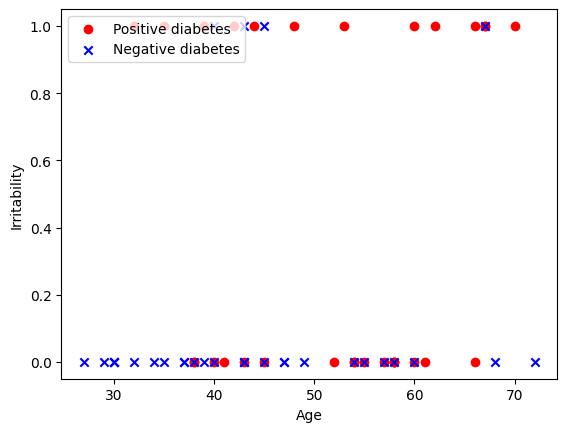

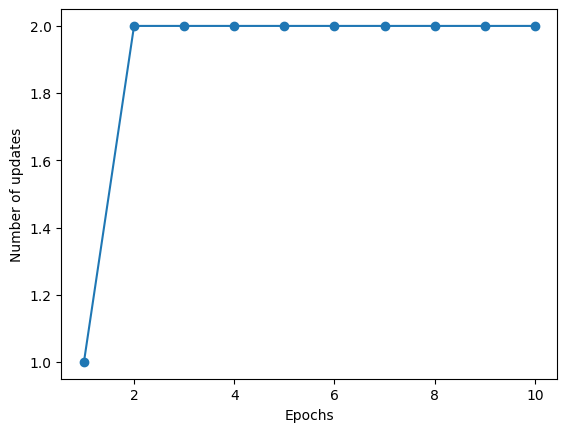

featuresX_array shape: (60, 16)
featuresX_array type: <class 'numpy.ndarray'>
targetsY_array shape: (60,)
targetsY_array type: <class 'numpy.ndarray'>


<ipython-input-29-e62ef75b2f1a>:128: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],


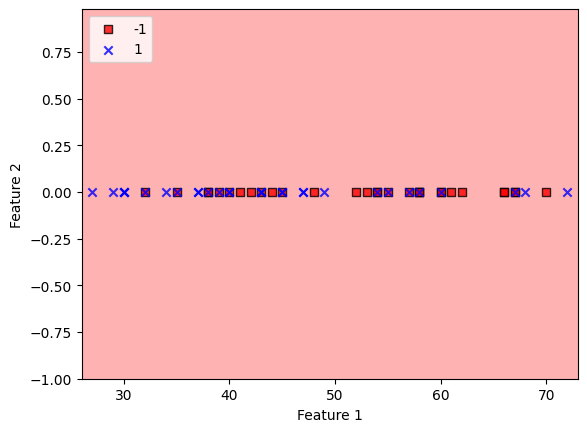

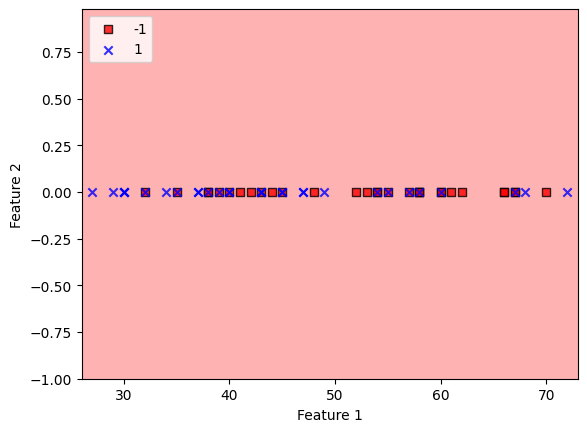

(60, 16)
(60,)


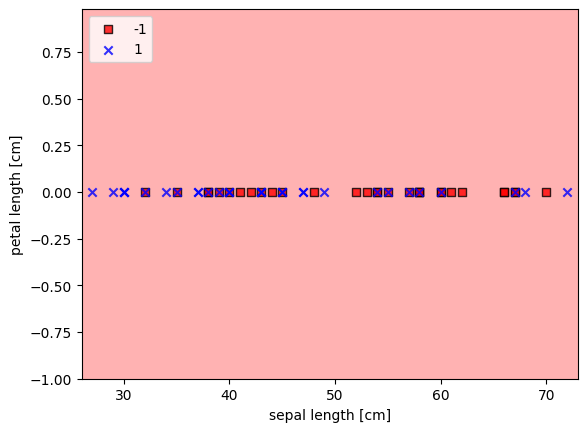

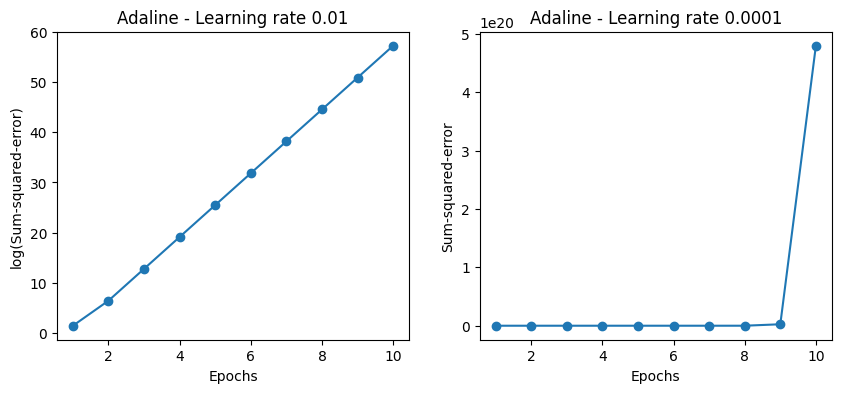

<ipython-input-29-e62ef75b2f1a>:280: RuntimeWarning: invalid value encountered in divide
  X_std[:, 1] = (featuresX_array[:, 1] - featuresX_array[:, 1].mean()) / featuresX_array[:, 1].std() # Use featuresX_array which is a NumPy array
<ipython-input-29-e62ef75b2f1a>:280: RuntimeWarning: invalid value encountered in cast
  X_std[:, 1] = (featuresX_array[:, 1] - featuresX_array[:, 1].mean()) / featuresX_array[:, 1].std() # Use featuresX_array which is a NumPy array
<ipython-input-29-e62ef75b2f1a>:238: RuntimeWarning: overflow encountered in square
  cost = (errors**2).sum() / 2.0
<ipython-input-29-e62ef75b2f1a>:110: RuntimeWarning: overflow encountered in scalar subtract
  x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
<ipython-input-29-e62ef75b2f1a>:112: RuntimeWarning: overflow encountered in scalar subtract
  np.arange(x2_min, x2_max, resolution))
<ipython-input-29-e62ef75b2f1a>:124: UserWarning: Attempting to set identical low and high ylims makes transformation singular; auto

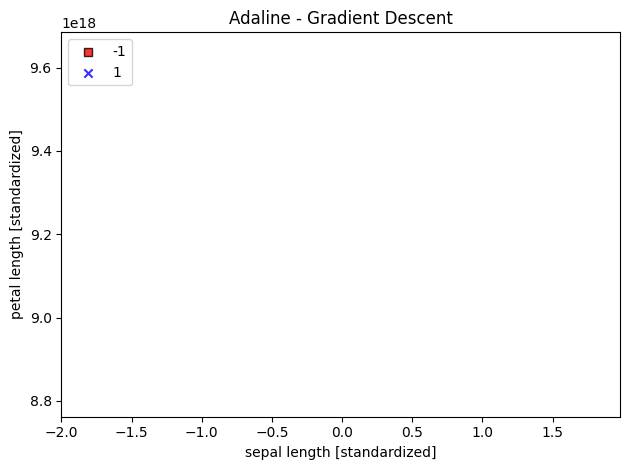

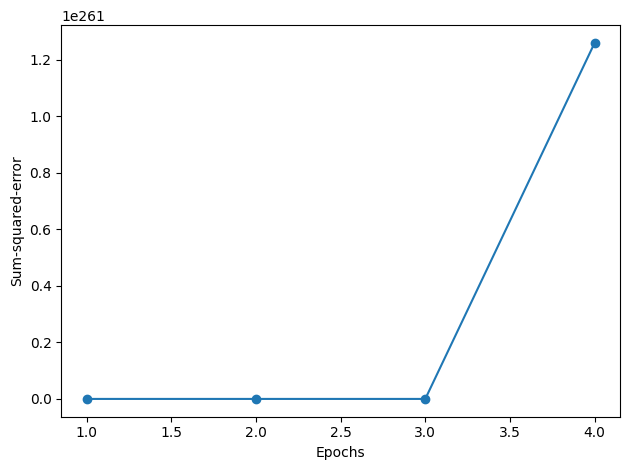

<ipython-input-29-e62ef75b2f1a>:396: RuntimeWarning: overflow encountered in scalar power
  cost = 0.5 * error**2
<ipython-input-29-e62ef75b2f1a>:394: RuntimeWarning: invalid value encountered in add
  self.w_[1:] += self.eta * xi.dot(error)


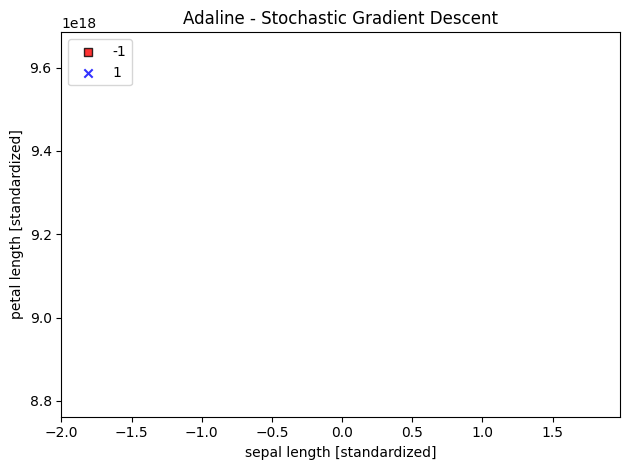

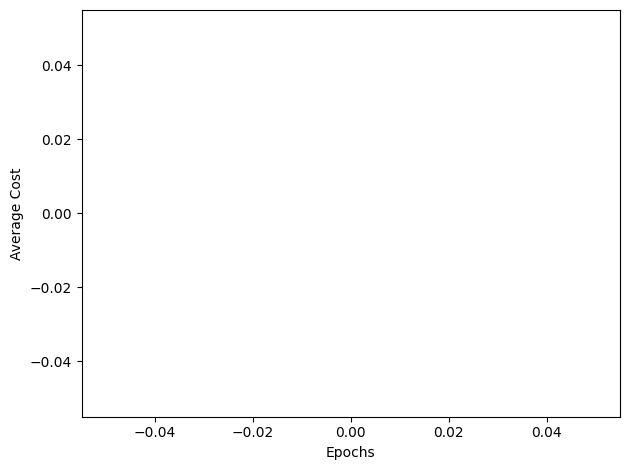

In [29]:
%pip install ucimlrepo

from IPython.display import Image
from matplotlib.colors import ListedColormap

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from ucimlrepo import fetch_ucirepo

early_stage_diabetes_risk_prediction = fetch_ucirepo(id=529)

X = early_stage_diabetes_risk_prediction.data.features
y = early_stage_diabetes_risk_prediction.data.targets
featuresX = []
targetsY = np.where(y.values == 'Positive', -1, 1)

def process_rows(X, count, offset=0):
    features = []

    for i in range(count):
        row_features = []
        row_features.append(X.values[i + offset][0])
        for j in range(1, len(X.columns)):
            if X.values[i + offset][j] == "Male" or X.values[i + offset][j] == "No":
                row_features.append(0)
            else:
                row_features.append(1)

        features.append(row_features)

    return features



featuresX += process_rows(X, 30)

featuresX += process_rows(X, 30, offset=202)

featuresX_array = np.array(featuresX)

auxArray = targetsY[:30].tolist() + targetsY[201:231].tolist()
targetsY_array = np.array(auxArray).ravel()


class Perceptron(object):
    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state

    def fit(self, X, y):
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1])
        self.errors_ = []

        for _ in range(self.n_iter):
            errors = 0
            for xi, target in zip(X, y):
                update = self.eta * (target - self.predict(xi))
                self.w_[1:] += update * xi
                self.w_[0] += update
                errors += int(update != 0.0)
            self.errors_.append(errors)
        return self

    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def predict(self, X):
        return np.where(self.net_input(X) >= 0.0, 1, -1)



v1 = np.array([1, 2, 3])
v2 = 0.5 * v1
np.arccos(v1.dot(v2) / (np.linalg.norm(v1) * np.linalg.norm(v2)))

plt.scatter(featuresX_array[:30, 0], featuresX_array[:30, 10],
            color='red', marker='o', label='Positive diabetes')
plt.scatter(featuresX_array[30:60, 0], featuresX_array[30:60, 10],
            color='blue', marker='x', label='Negative diabetes')



plt.xlabel('Age')
plt.ylabel('Irritability')
plt.legend(loc='upper left')
plt.show()



ppn = Perceptron(eta=0.1, n_iter=10)

ppn.fit(featuresX_array, targetsY_array)

plt.plot(range(1, len(ppn.errors_) + 1), ppn.errors_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of updates')

plt.show()

def plot_decision_regions(X, y, classifier, resolution=0.02):
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # Configura los límites de los ejes
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))

    # Crear una cuadrícula de puntos para predecir
    grid = np.array([xx1.ravel(), xx2.ravel()]).T
    pr = np.zeros((grid.shape[0], X.shape[1]))  # Cambiar a la forma correcta
    pr[:, :2] = grid[:, :2]  # Asegúrate de que solo asignas las columnas relevantes

    # Predecir usando el clasificador
    Z = classifier.predict(pr)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # Graficar las muestras de cada clase
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                    alpha=0.8, c=colors[idx],
                    marker=markers[idx], label=cl,
                    edgecolor='black')


print("featuresX_array shape:", featuresX_array.shape)
print("featuresX_array type:", type(featuresX_array))
print("targetsY_array shape:", targetsY_array.shape)
print("targetsY_array type:", type(targetsY_array))

# Llama a la función

plot_decision_regions(featuresX_array, targetsY_array, classifier=ppn)
plt.xlabel('Feature 1')  # Cambia según la característica que estés usando
plt.ylabel('Feature 2')  # Cambia según la característica que estés usando
plt.legend(loc='upper left')
plt.show()


# Ahora llama a la función
plot_decision_regions(featuresX_array, targetsY_array, classifier=ppn)
plt.xlabel('Feature 1')  # Cambia según la característica que estés usando
plt.ylabel('Feature 2')  # Cambia según la característica que estés usando
plt.legend(loc='upper left')
plt.show()

# In[14]:

print(featuresX_array.shape)  # Esto debe mostrar algo como (n_samples, n_features)
print(targetsY_array.shape)

plot_decision_regions(featuresX_array, targetsY_array, classifier=ppn)
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')

# plt.savefig('images/02_08.png', dpi=300)
plt.show()

# # Neuronas lineales adaptativas y la convergencia del aprendizaje
# ...
# ## Minimizar funciones de coste con el descenso de gradiente
# In[15]:

# In[16]:

# ## Implementar Adaline en Python
# In[17]:

class AdalineGD(object):
    """ADAptive LInear NEuron classifier.

    Parameters
    ------------
    eta : float
      Learning rate (between 0.0 and 1.0)
    n_iter : int
      Passes over the training dataset.
    random_state : int
      Random number generator seed for random weight
      initialization.


    Attributes
    -----------
    w_ : 1d-array
      Weights after fitting.
    cost_ : list
      Sum-of-squares cost function value in each epoch.

    """
    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state

    def fit(self, X, y):
        """ Fit training data.

        Parameters
        ----------
        X : {array-like}, shape = [n_samples, n_features]
          Training vectors, where n_samples is the number of samples and
          n_features is the number of features.
        y : array-like, shape = [n_samples]
          Target values.

        Returns
        -------
        self : object

        """
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1])
        self.cost_ = []

        for i in range(self.n_iter):
            net_input = self.net_input(X)
            # Ten en cuenta que el método "activación" no produce ningún efecto
            # sobre el código, puesto que es simplemente una función de identidad.
            # En su lugar, podemos escribir directamente `output = self.net_input(X)`.
            # El objetivo de la activación es más conceptual, por ejemplo,
            # en el caso de una regresión logística (como veremos más tarde),
            # podríamos cambiarla a
            # una función sigmoide para implementar un clasificador de regresión logística.
            output = self.activation(net_input)
            errors = (y - output)
            self.w_[1:] += self.eta * X.T.dot(errors)
            self.w_[0] += self.eta * errors.sum()
            cost = (errors**2).sum() / 2.0
            self.cost_.append(cost)
        return self

    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def activation(self, X):
        """Compute linear activation"""
        return X

    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.activation(self.net_input(X)) >= 0.0, 1, -1)

# In[18]:

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

ada1 = AdalineGD(n_iter=10, eta=0.01).fit(featuresX_array, targetsY_array)
ax[0].plot(range(1, len(ada1.cost_) + 1), np.log10(ada1.cost_), marker='o')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('log(Sum-squared-error)')
ax[0].set_title('Adaline - Learning rate 0.01')

ada2 = AdalineGD(n_iter=10, eta=0.0001).fit(featuresX_array, targetsY_array)
ax[1].plot(range(1, len(ada2.cost_) + 1), ada2.cost_, marker='o')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Sum-squared-error')
ax[1].set_title('Adaline - Learning rate 0.0001')

# plt.savefig('images/02_11.png', dpi=300)
plt.show()

# In[19]:
# ## Mejorar el descenso de gradiente mediante el escalado de características
# In[20]:
# In[21]:
# estandarizar características
X_std = np.copy(featuresX_array)
X_std[:, 0] = (featuresX_array[:, 0] - featuresX_array[:, 0].mean()) / featuresX_array[:, 0].std() # Use featuresX_array which is a NumPy array
X_std[:, 1] = (featuresX_array[:, 1] - featuresX_array[:, 1].mean()) / featuresX_array[:, 1].std() # Use featuresX_array which is a NumPy array

# In[22]:

ada = AdalineGD(n_iter=15, eta=0.01)
ada.fit(X_std, targetsY_array)

plot_decision_regions(X_std, targetsY_array, classifier=ada)
plt.title('Adaline - Gradient Descent')
plt.xlabel('sepal length [standardized]')
plt.ylabel('petal length [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
# plt.savefig('images/02_14_1.png', dpi=300)
plt.show()

plt.plot(range(1, len(ada.cost_) + 1), ada.cost_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Sum-squared-error')

plt.tight_layout()
# plt.savefig('images/02_14_2.png', dpi=300)
plt.show()

# ## Aprendizaje automático a gran escala y descenso de gradiente estocástico
# In[23]:

class AdalineSGD(object):
    """ADAptive LInear NEuron classifier.

    Parameters
    ------------
    eta : float
      Learning rate (between 0.0 and 1.0)
    n_iter : int
      Passes over the training dataset.
    shuffle : bool (default: True)
      Shuffles training data every epoch if True to prevent cycles.
    random_state : int
      Random number generator seed for random weight
      initialization.


    Attributes
    -----------
    w_ : 1d-array
      Weights after fitting.
    cost_ : list
      Sum-of-squares cost function value averaged over all
      training samples in each epoch.


    """
    def __init__(self, eta=0.01, n_iter=10, shuffle=True, random_state=None):
        self.eta = eta
        self.n_iter = n_iter
        self.w_initialized = False
        self.shuffle = shuffle
        self.random_state = random_state

    def fit(self, X, y):
        """ Fit training data.

        Parameters
        ----------
        X : {array-like}, shape = [n_samples, n_features]
          Training vectors, where n_samples is the number of samples and
          n_features is the number of features.
        y : array-like, shape = [n_samples]
          Target values.

        Returns
        -------
        self : object

        """
        self._initialize_weights(X.shape[1])
        self.cost_ = []
        for i in range(self.n_iter):
            if self.shuffle:
                X, y = self._shuffle(X, y)
            cost = []
            for xi, target in zip(X, y):
                cost.append(self._update_weights(xi, target))
            avg_cost = sum(cost) / len(y)
            self.cost_.append(avg_cost)
        return self

    def partial_fit(self, X, y):
        """Fit training data without reinitializing the weights"""
        if not self.w_initialized:
            self._initialize_weights(X.shape[1])
        if y.ravel().shape[0] > 1:
            for xi, target in zip(X, y):
                self._update_weights(xi, target)
        else:
            self._update_weights(X, y)
        return self

    def _shuffle(self, X, y):
        """Shuffle training data"""
        r = self.rgen.permutation(len(y))
        return X[r], y[r]

    def _initialize_weights(self, m):
        """Initialize weights to small random numbers"""
        self.rgen = np.random.RandomState(self.random_state)
        self.w_ = self.rgen.normal(loc=0.0, scale=0.01, size=1 + m)
        self.w_initialized = True

    def _update_weights(self, xi, target):
        """Apply Adaline learning rule to update the weights"""
        output = self.activation(self.net_input(xi))
        error = (target - output)
        self.w_[1:] += self.eta * xi.dot(error)
        self.w_[0] += self.eta * error
        cost = 0.5 * error**2
        return cost

    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def activation(self, X):
        """Compute linear activation"""
        return X

    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.activation(self.net_input(X)) >= 0.0, 1, -1)

# In[24]:

ada = AdalineSGD(n_iter=15, eta=0.01, random_state=1)
ada.fit(X_std, targetsY_array)

plot_decision_regions(X_std, targetsY_array, classifier=ada)
plt.title('Adaline - Stochastic Gradient Descent')
plt.xlabel('sepal length [standardized]')
plt.ylabel('petal length [standardized]')
plt.legend(loc='upper left')

plt.tight_layout()
# plt.savefig('images/02_15_1.png', dpi=300)
plt.show()

plt.plot(range(1, len(ada.cost_) + 1), ada.cost_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Average Cost')

plt.tight_layout()
# plt.savefig('images/02_15_2.png', dpi=300)
plt.show()

# In[25]:

ada.partial_fit(X_std[0, :], targetsY_array[0])

# # Resumen
# ...
# ---
#
# El lector puede omitir las siguientes celdas
# In[9]:
# In[ ]:
